# EDA Absentismo laboral Equipo 12 

Primero conectar con la base de datos para explorar los datos 

In [1]:
!pip install sqlalchemy pymysql #instalo lectir de Mysql

ERROR: Invalid requirement: '#instalo'

[notice] A new release of pip available: 22.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
#Agrego las visualizaciones y funciones que vamos a utilizar
import pandas as pd 
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Parámetros de conexión
usuario = 'Equipo12'
contraseña = 'E1q2u3i4p5o12'
host = '212.227.90.6'
puerto = '3306'
base_de_datos = 'Equip_12'

# Crear motor de conexión
engine = create_engine(f"mysql+pymysql://{usuario}:{contraseña}@{host}:{puerto}/{base_de_datos}")

# Carga de datos

# Cargar la tabla 'RRHH'
df = pd.read_sql("SELECT * FROM RRHH", engine)

# Ver primeras filas

df.head()

,ID,Reason_absence,Month_absence,Day_week,Seasons,Transportation_expense,Distance_Residence_Work,Service_time,Age,Work_load_Average_day,...,Disciplinary_failure,Education,Son,Social_drinker,Social_smoker,Pet,Weight,Height,Body_mass_index,Absenteeism_hours
0,14,11,11,2,4,155,12,14,34,"284,031",...,0,1,2,1,0,0,95,196,25,120
1,36,13,4,4,3,118,13,18,50,"239,409",...,0,1,1,1,0,0,98,178,31,120
2,9,6,7,3,1,228,14,16,58,"264,604",...,0,1,2,0,0,1,65,172,22,120
3,28,9,7,3,1,225,26,9,28,"230,290",...,0,1,1,0,0,2,69,169,24,112
4,9,12,3,3,2,228,14,16,58,"222,196",...,0,1,2,0,0,1,65,172,22,112


In [4]:
# Dimensiones del dataset

df.shape  # (filas, columnas)

(740, 21)

In [5]:
# Tipos de datos por columna

df.dtypes

ID                          int64
Reason_absence              int64
Month_absence               int64
Day_week                    int64
Seasons                     int64
Transportation_expense      int64
Distance_Residence_Work     int64
Service_time                int64
Age                         int64
Work_load_Average_day      object
Hit_target                  int64
Disciplinary_failure       object
Education                  object
Son                        object
Social_drinker             object
Social_smoker              object
Pet                        object
Weight                      int64
Height                      int64
Body_mass_index             int64
Absenteeism_hours           int64
dtype: object

In [6]:
# Valores nulos por columna

df.isnull().sum()

ID                         0
Reason_absence             0
Month_absence              0
Day_week                   0
Seasons                    0
Transportation_expense     0
Distance_Residence_Work    0
Service_time               0
Age                        0
Work_load_Average_day      0
Hit_target                 0
Disciplinary_failure       0
Education                  0
Son                        0
Social_drinker             0
Social_smoker              0
Pet                        0
Weight                     0
Height                     0
Body_mass_index            0
Absenteeism_hours          0
dtype: int64

In [7]:
# Descripción general

df.describe()

,ID,Reason_absence,Month_absence,Day_week,Seasons,Transportation_expense,Distance_Residence_Work,Service_time,Age,Hit_target,Weight,Height,Body_mass_index,Absenteeism_hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,94.587838,79.035135,172.114865,26.677027,6.924324
std,11.021247,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,3.779313,12.883211,6.034995,4.285452,13.330998
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,81.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,93.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,95.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,97.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,100.000000,108.000000,196.000000,38.000000,120.000000


## Visualizaciones Básicas

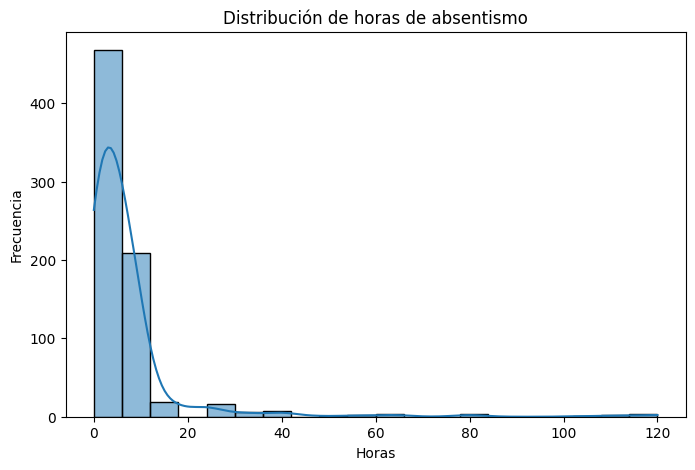

In [8]:
# Histograma de horas de ausencia

plt.figure(figsize=(8, 5))
sns.histplot(df['Absenteeism_hours'], bins=20, kde=True)
plt.title("Distribución de horas de absentismo")
plt.xlabel("Horas")
plt.ylabel("Frecuencia")
plt.show()

El eje X (horizontal) muestra el número de horas de ausencia.

El eje Y (vertical) muestra cuántos registros hay para cada rango de horas.

La distribución del número de horas de ausencia está altamente sesgada hacia la derecha,

con una mayoría de casos concentrados entre 0 y 10 horas. Existen valores extremos por encima

de las 80 horas que podrían considerarse outliers y requerir análisis adicional.

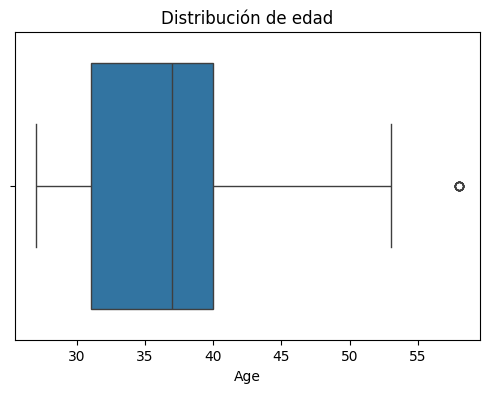

In [9]:
# Boxplot de edad

plt.figure(figsize=(6, 4))
sns.boxplot(x=df['Age'])
plt.title("Distribución de edad")
plt.show()

La edad de los empleados se concentra entre los 30 y 45 años, con una mediana cercana a los 36.

Se observa al menos un outlier por encima de los 55 años, lo cual podría indicar un caso atípico en relación a la plantilla general

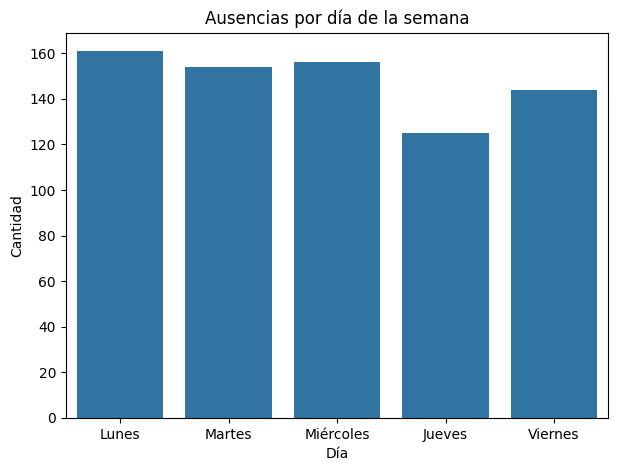

In [10]:
# Ausencias por día de la semana

dias = {2: 'Lunes', 3: 'Martes', 4: 'Miércoles', 5: 'Jueves', 6: 'Viernes'}
df['Día'] = df['Day_week'].map(dias)

plt.figure(figsize=(7, 5))
sns.countplot(x='Día', data=df, order=['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes'])
plt.title("Ausencias por día de la semana")
plt.ylabel("Cantidad")
plt.show()


Los datos muestran que el lunes es el día con mayor cantidad de ausencias, 

lo que podría estar asociado al retorno tras el fin de semana. Las ausencias tienden a disminuir hacia el jueves,

que registra el valor más bajo, y luego aumentan ligeramente el viernes. Este patrón puede reflejar tanto causas

médicas como dinámicas personales o laborales.

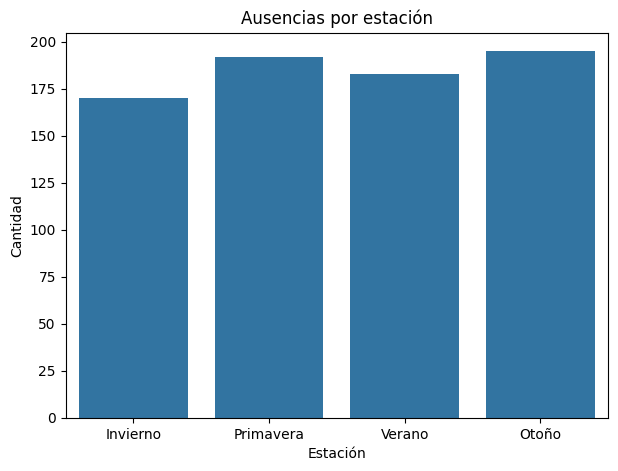

In [11]:
# Ausencias por estación del año

estaciones = {1: 'Invierno', 2: 'Primavera', 3: 'Verano', 4: 'Otoño'}
df['Estación'] = df['Seasons'].map(estaciones)

plt.figure(figsize=(7, 5))
sns.countplot(x='Estación', data=df, order=['Invierno', 'Primavera', 'Verano', 'Otoño'])
plt.title("Ausencias por estación")
plt.ylabel("Cantidad")
plt.show()

El mayor número de ausencias se registra durante el otoño, seguido de primavera y verano.

Contrario a lo esperado, el invierno presenta el menor nivel de ausentismo. 

Esto sugiere que los factores estacionales podrían estar más ligados a alergias, cansancio o factores externos,

más que a enfermedades invernales como gripes o resfriados

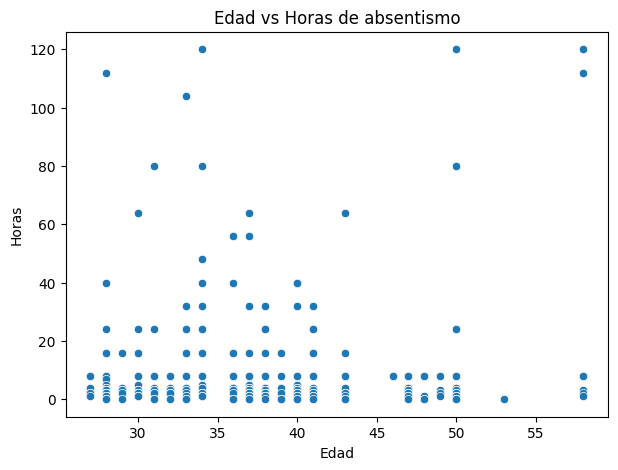

In [12]:
# Relación entre edad y horas de ausencia

plt.figure(figsize=(7, 5))
sns.scatterplot(x='Age', y='Absenteeism_hours', data=df)
plt.title("Edad vs Horas de absentismo")
plt.xlabel("Edad")
plt.ylabel("Horas")
plt.show()

El gráfico de dispersión muestra que el mayor volumen de ausencias se concentra entre las 0 y 10 horas,

independientemente de la edad. Sin embargo, las edades entre 30 y 40 años presentan mayor variabilidad en el absentismo.

No se aprecia una relación directa entre edad y horas de ausencia, lo que sugiere que la edad por sí sola no explica el comportamiento del absentismo

In [14]:
# Correlacion de Pearson

df[['Age', 'Absenteeism_hours']].corr()

,Age,Absenteeism_hours
Age,1.00000,0.06576
Absenteeism_hours,0.06576,1.00000


El coeficiente de correlación de Pearson entre la edad y las horas de absentismo es de 0.0657,

lo que indica una relación casi nula entre ambas variables. Esto respalda lo observado 

en el gráfico de dispersión: la edad no parece ser un factor determinante en la duración de las ausencias laborales en este conjunto de datos.

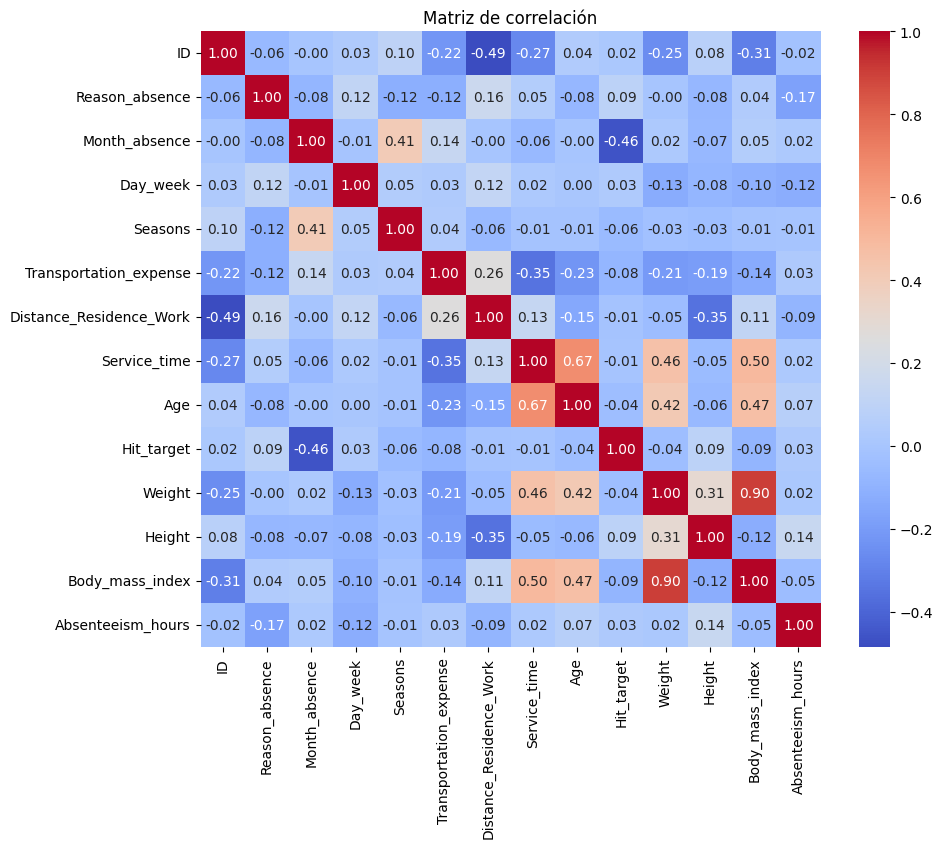

In [16]:
# Correlacion entre variables numéricas

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlación")
plt.show()

La matriz de correlación revela que no hay variables numéricas con una relación fuerte con el número de horas de absentismo.

Las correlaciones más altas se dan entre variables esperables, como Edad y Tiempo de servicio (0.67), o Peso y Índice de masa corporal (0.90).

La ausencia de correlaciones fuertes con la variable objetivo sugiere que otros factores, como las razones de ausencia o aspectos categóricos,

podrían ser más relevantes para explicar el absentismo